In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [230]:
import warnings
warnings.filterwarnings("ignore")

In [231]:
df = pd.read_csv("data/consumption_temp.csv")
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

In [232]:
bgo = df.query('location == "bergen"')
osl = df.query('location == "oslo"')
svg = df.query('location == "stavanger"')
tos = df.query('location == "tromsø"')
trd = df.query('location == "trondheim"')
hel = df.query('location == "helsingfors"')

In [233]:
bgo = bgo['consumption'].to_frame()
bgo.head()

,consumption
time,
2022-04-07 21:00:00,1.113325
2022-04-07 22:00:00,1.050327
2022-04-07 23:00:00,1.008794
2022-04-08 00:00:00,0.984202
2022-04-08 01:00:00,0.950335


<Axes: xlabel='time'>

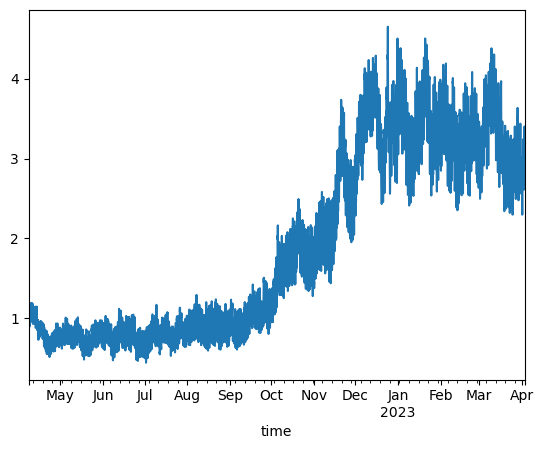

In [234]:
bgo['consumption'].plot()

# Test/train

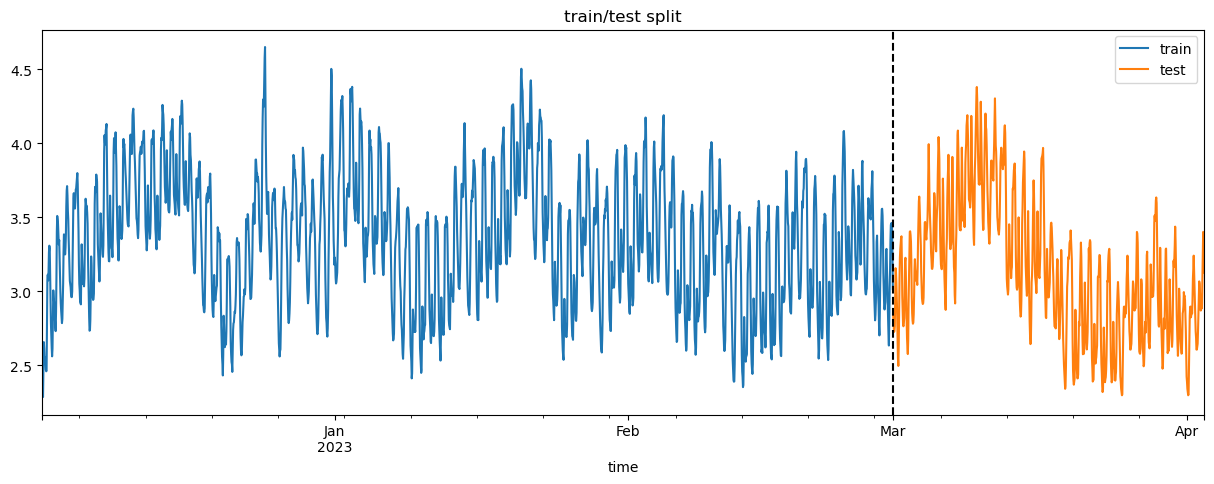

In [235]:
# only use 2023 data
bgo = bgo.query('time > "12-2022"')

train = bgo.loc[bgo.index < "03-01-2023"]
test = bgo.loc[bgo.index >= "03-01-2023"]

fig, ax = plt.subplots(figsize=(15,5))
train["consumption"].plot(ax=ax, label="train", title="train/test split")
test["consumption"].plot(ax=ax, label="test")
ax.axvline("03-01-2023", color="black", ls="--")
ax.legend(["train", "test"])
plt.show()

# Step 1: Check for stationarity of time series

### Method #1: time series plot

### Method #2: ACF plot and PACF plot

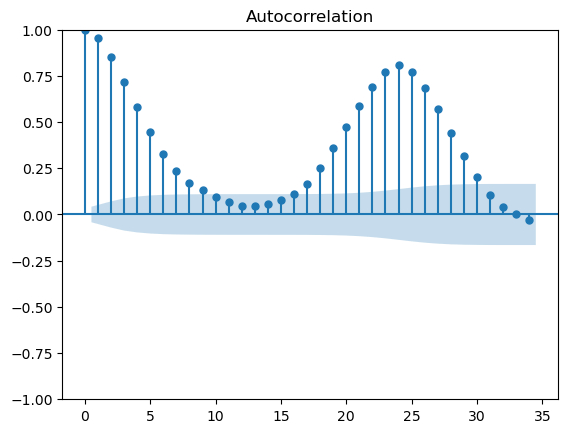

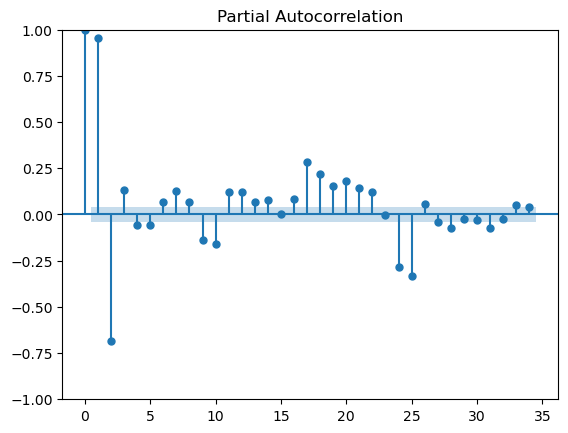

In [236]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train['consumption'])
pacf_original = plot_pacf(train['consumption'])

### Method #3: ADF test

In [237]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0016486671755190974


# Auto-fit the ARIMA model

In [247]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
auto_arima = pm.auto_arima(train, m=3)
auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(2, 0, 1, 3),
      suppress_warnings=True, with_intercept=False)

# Plot predictions

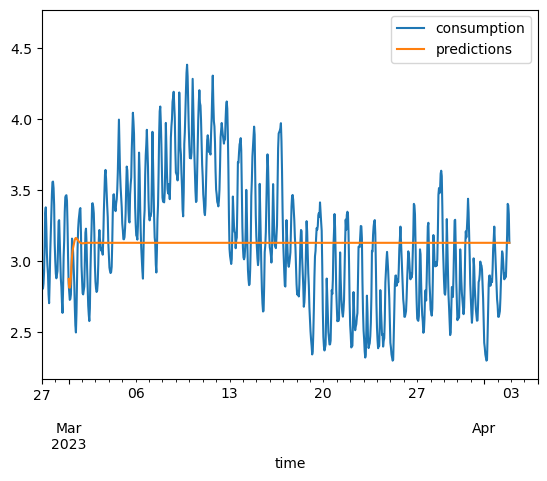

In [248]:
predictions = auto_arima.predict(n_periods=len(test))
bgo['predictions'] = [None]*len(train) + list(predictions)

bgo.plot() 
plt.xlim('2023-02-27', '2023-04-5')
plt.show()

### RMSE

In [249]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'rmse - auto: {rmse}')

rmse - auto: 0.4540261597920875
